<a href="https://colab.research.google.com/github/ParisaEb/Predicting-Contraceptive-Method-used-/blob/main/Predicting-Contraceptive-Method-used.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('cmc.csv')
#da
#df = da[["Wife's age","Contraceptive method used"]]

In [ ]:
df

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1
...,...,...,...,...,...,...,...,...,...,...
1468,33,4,4,2,1,0,2,4,0,3
1469,33,4,4,3,1,1,1,4,0,3
1470,39,3,3,8,1,0,1,4,0,3
1471,33,3,3,4,1,0,2,2,0,3


In [ ]:
df['is_train']=np.random.uniform(0,1,len(df))<=0.75

In [ ]:
df.head(14)

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used,is_train
0,24,2,3,3,1,1,2,3,0,1,True
1,45,1,3,10,1,1,3,4,0,1,True
2,43,2,3,7,1,1,3,4,0,1,False
3,42,3,2,9,1,1,3,3,0,1,True
4,36,3,3,8,1,1,3,2,0,1,False
5,19,4,4,0,1,1,3,3,0,1,True
6,38,2,3,6,1,1,3,2,0,1,True
7,21,3,3,1,1,0,3,2,0,1,True
8,27,2,3,3,1,1,3,4,0,1,False
9,45,1,1,8,1,1,2,2,1,1,True


In [ ]:
train,test=df[df['is_train']==True],df[df['is_train']==False]

In [ ]:
print('Number of observations in training date is ',len(train))
print('Number of observations in test date is ',len(test))

Number of observations in training date is  1096
Number of observations in test date is  377


In [ ]:
feautures=df.columns[:9]

In [ ]:
feautures

Index(['Wife's age', 'Wife's education', 'Husband's education',
       'Number of children ever born', 'Wife's religion', 'Wife's now working',
       'Husband's occupation', 'Standard-of-living index', 'Media exposure'],
      dtype='object')

In [ ]:
y=train['Contraceptive method used']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf=RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
clf.fit(train[feautures],y)

RandomForestClassifier(n_jobs=2, random_state=0)

In [ ]:
predicted=clf.predict(test[feautures])

In [ ]:
predicted

array([2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3,
       1, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 1, 3,
       1, 3, 3, 1, 1, 1, 2, 1, 3, 3, 2, 2, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3,
       3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 1, 1, 3, 3, 1, 2,
       3, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 2, 3, 1,

In [ ]:
clf.predict(test[feautures])

array([2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 3, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 2, 1, 1, 3, 1, 2, 1, 3, 1, 1, 3,
       3, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 3, 3, 1, 1, 1, 2, 1, 3, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 2, 1, 3, 3, 2, 2, 2, 1, 3,
       1, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 2, 3, 1, 1, 3, 3, 1,
       3, 3, 3, 1, 1, 1, 1, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 1, 3,
       1, 3, 3, 1, 1, 1, 2, 1, 3, 3, 2, 2, 3, 1, 1, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 1, 3, 3, 2, 3, 1, 1,
       1, 3, 3, 2, 3, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 3,
       3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 3, 3, 2, 1, 1, 1, 3, 3, 1, 2,
       3, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 2, 3, 1,

In [ ]:
clf.predict_proba(test[feautures])[0:10]

array([[0.25  , 0.62  , 0.13  ],
       [0.21  , 0.52  , 0.27  ],
       [0.579 , 0.06  , 0.361 ],
       [0.3575, 0.58  , 0.0625],
       [0.99  , 0.    , 0.01  ],
       [0.87  , 0.11  , 0.02  ],
       [0.85  , 0.05  , 0.1   ],
       [0.81  , 0.13  , 0.06  ],
       [0.92  , 0.02  , 0.06  ],
       [0.87  , 0.01  , 0.12  ]])

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
train.head(600)

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used,is_train
0,24,2,3,3,1,1,2,3,0,1,True
1,45,1,3,10,1,1,3,4,0,1,True
3,42,3,2,9,1,1,3,3,0,1,True
5,19,4,4,0,1,1,3,3,0,1,True
6,38,2,3,6,1,1,3,2,0,1,True
...,...,...,...,...,...,...,...,...,...,...,...
814,17,3,4,1,1,1,2,1,0,3,True
815,25,2,4,3,1,1,3,3,0,3,True
817,23,4,4,1,1,1,3,3,0,3,True
820,31,1,1,3,1,1,4,2,1,3,True


In [ ]:
pd.crosstab(test['Contraceptive method used'],predicted,rownames=['Actual Methods'],colnames=['predicted Methods'])

predicted Methods,1,2,3
Actual Methods,,,
1,108,20,51
2,20,29,33
3,37,26,53


In [ ]:
list(zip(train[feautures],clf.feature_importances_))

[("Wife's age", 0.35000439865795274),
 ("Wife's education", 0.08519779769275725),
 ("Husband's education", 0.06774793777314365),
 ('Number of children ever born', 0.2331933632984069),
 ("Wife's religion", 0.032819768342204035),
 ("Wife's now working", 0.044892995706999034),
 ("Husband's occupation", 0.08104597976329697),
 ('Standard-of-living index', 0.08903983827388848),
 ('Media exposure', 0.016057920491351005)]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Print a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.559419401370357
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.67      0.70       130
           2       0.58      0.37      0.45        71
           3       0.50      0.71      0.59        94

    accuracy                           0.61       295
   macro avg       0.61      0.58      0.58       295
weighted avg       0.63      0.61      0.61       295



In [ ]:
X=df.iloc[:,1:9]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = gnb.predict(X_test)

In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 72.54237288135593


In [ ]:
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

Number of mislabeled points out of a total 590 points : 162


In [ ]:

# Importing the dataset
dataset = pd.read_csv('cmc.csv')

x = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
    # Fitting Naive Bayes to the Training set
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
    # Predicting the Test set results
    y_pred = classifier.predict(x_test)

In [ ]:
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    cm

array([[73, 39, 50],
       [15, 60, 21],
       [35, 34, 42]])

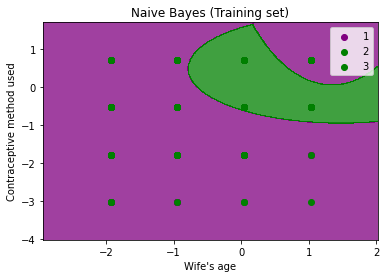

In [ ]:
    # Visualising the Training set results
    from matplotlib.colors import ListedColormap
    x_set, y_set = x_train, y_train
    X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01)
                         )
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('purple', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                    c = ListedColormap(('purple', 'green'))(i), label = j)
    plt.title('Naive Bayes (Training set)')
    plt.xlabel("Wife's age")
    plt.ylabel('Contraceptive method used')
    plt.legend()
    plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
model = GaussianNB()
#model = MultinomialNB()
model.fit(X, y);

print("Means:", model.theta_)
print("Variances:", model.var_)


Means: [[2.6709062  3.28139905 2.93481717 0.88076312 0.72972973 2.20031797
  2.95389507 0.11764706]
 [3.45645646 3.66366366 3.73873874 0.77177177 0.73273273 1.84084084
  3.46846847 0.03003003]
 [2.98825832 3.45988258 3.35225049 0.86497065 0.78473581 2.25440313
  3.1369863  0.04892368]]
Variances: [[1.10473384 0.81270647 7.04026631 0.10501946 0.19722426 0.70391087
  1.08690455 0.10380623]
 [0.63248835 0.49949049 4.41522604 0.17614011 0.19583548 0.78247618
  0.59134811 0.02912823]
 [0.93136899 0.53019099 4.19294504 0.11679643 0.16892552 0.70240234
  0.90882771 0.04653016]]


In [ ]:
#Unsupervised algorithm

In [ ]:
features = ["Wife's age","Contraceptive method used","Number of children ever born","Wife's education"]
df = df.dropna(subset=features)

In [ ]:
data = df[features].copy()
data

,Wife's age,Contraceptive method used,Number of children ever born,Wife's education
0,24,1,3,2
1,45,1,10,1
2,43,1,7,2
3,42,1,9,3
4,36,1,8,3
...,...,...,...,...
1468,33,3,2,4
1469,33,3,3,4
1470,39,3,8,3
1471,33,3,4,3


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


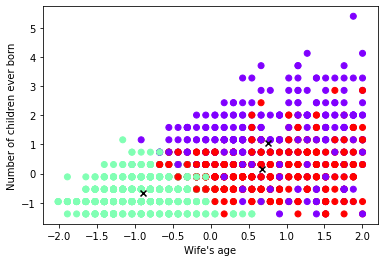

         Wife's age  Wife's education  Husband's education  \
cluster                                                      
0         38.739884          1.843931             2.786127   
1         25.215926          2.972435             3.473201   
2         38.099156          3.753165             3.839662   

         Number of children ever born  Wife's religion  Wife's now working  \
cluster                                                                      
0                            5.736994         0.921965            0.768786   
1                            1.702910         0.906585            0.764165   
2                            3.601266         0.721519            0.715190   

         Husband's occupation  Standard-of-living index  Media exposure  \
cluster                                                                   
0                    2.398844                  2.841040        0.199422   
1                    2.297090                  2.958652        0.042879  

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


data = df


X = data[["Wife's age", "Number of children ever born", "Wife's education"]].values


from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)


kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
plt.xlabel("Wife's age")
plt.ylabel("Number of children ever born")
plt.show()

labels = kmeans.labels_
df['cluster'] = labels
print(df.groupby('cluster').mean())


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: F

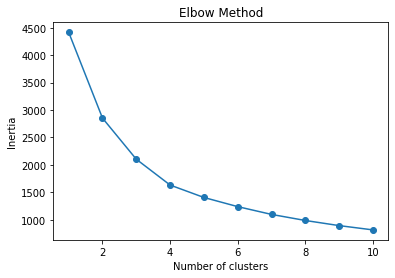

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


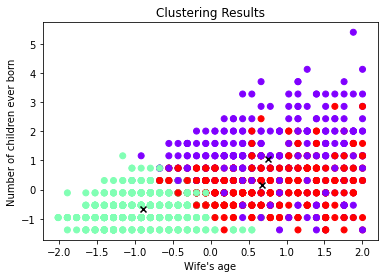

Silhouette Score: 0.3268575993520228


In [ ]:

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = df


X = data[["Wife's age", "Number of children ever born", "Wife's education"]].values


X = StandardScaler().fit_transform(X)


inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


kmeans = KMeans(n_clusters=3, random_state=42).fit(X)


plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
plt.xlabel("Wife's age")
plt.ylabel("Number of children ever born")
plt.title('Clustering Results')
plt.show()


from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette)






In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
df = pd.read_csv('cmc.csv')

# Split the dataset into X and y
X = df.drop('Contraceptive method used', axis=1)
y = df['Contraceptive method used']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'criterion': ['gini', 'entropy']
}

# Define the scoring metric
scoring = 'accuracy'

# Create a grid search object
rf_grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring=scoring, cv=5)

# Fit the grid search object to the training data
rf_grid_search.fit(X_train, y_train)

# Extract the best hyperparameters and best score
best_params = rf_grid_search.best_params_
best_score = rf_grid_search.best_score_

# Train and test the final model with the best hyperparameters
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


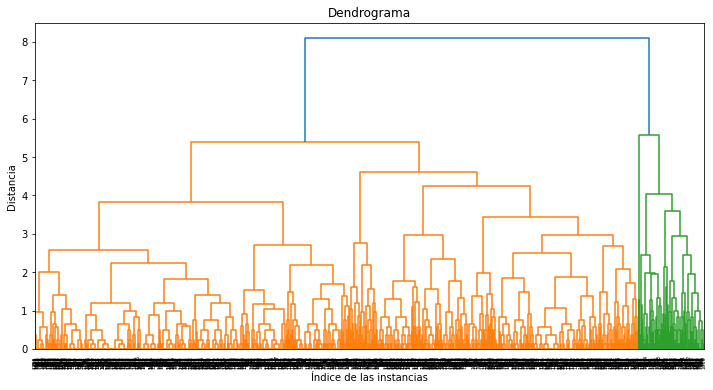

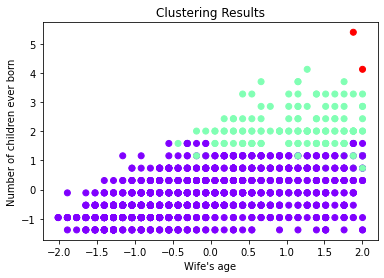

Silhouette Score: 0.3604484783018062


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


data = df

X = data[["Wife's age", "Number of children ever born", "Wife's education"]].values

X = StandardScaler().fit_transform(X)


Z = linkage(X, method='complete')


plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title("Dendrograma")
plt.xlabel("Índice de las instancias")
plt.ylabel("Distancia")
plt.show()


from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=3, linkage='complete')
agg.fit(X)


plt.scatter(X[:, 0], X[:, 1], c=agg.labels_, cmap='rainbow')
plt.xlabel("Wife's age")
plt.ylabel("Number of children ever born")
plt.title('Clustering Results')
plt.show()


from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, agg.labels_)
print("Silhouette Score:", silhouette)




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
data = pd.read_csv("cmc.csv")

# Separate features from target
X = data.drop("Contraceptive method used", axis=1)
y = data["Contraceptive method used"]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate a Naive Bayes model
model = GaussianNB()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred,average='weighted'))
print("Confusion matrix:", confusion_matrix(y_test, y_pred))


Accuracy: 0.44745762711864406
Precision: 0.48893166229864
Recall: 0.44745762711864406
F1-score: 0.45129118057084155
Confusion matrix: [[50 31 49]
 [ 6 35 30]
 [24 23 47]]
